# Stack Overflow Survey 2021

## Take a Look at the Data
Take a look at some of the charateristics of the dataset

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [273]:
df = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_public.csv')

In [274]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [275]:
df.shape 

(83439, 48)

In [276]:
#Check missing value
df.isnull().mean()

ResponseId                      0.000000
MainBranch                      0.000000
Employment                      0.001390
Country                         0.000000
US_State                        0.821187
UK_Country                      0.947051
EdLevel                         0.003751
Age1stCode                      0.002349
LearnCode                       0.005705
YearsCode                       0.021549
YearsCodePro                    0.266338
DevType                         0.203202
OrgSize                         0.272211
Currency                        0.267968
CompTotal                       0.434521
CompFreq                        0.374993
LanguageHaveWorkedWith          0.012968
LanguageWantToWorkWith          0.079315
DatabaseHaveWorkedWith          0.166505
DatabaseWantToWorkWith          0.301298
PlatformHaveWorkedWith          0.375172
PlatformWantToWorkWith          0.501204
WebframeHaveWorkedWith          0.260454
WebframeWantToWorkWith          0.375652
MiscTechHaveWork

In [277]:
# Check data types
df.dtypes

ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
US_State                         object
UK_Country                       object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object


In [278]:
# Check repondents' country proportion and find whether the size of observation is large enough for me to study a specific country like USA
df.Country.value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
                                                        ...  
Saint Kitts and Nevis                                       1
Dominica                                                    1
Saint Vincent and the Grenadines                            1
Tuvalu                                                      1
Papua New Guinea                                            1
Name: Country, Length: 181, dtype: int64

In [279]:
# Check repondents' education proportion
df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          35357
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17512
Some college/university study without earning a degree                                10589
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2567
Primary/elementary school                                                              2479
Associate degree (A.A., A.S., etc.)                                                    2231
Something else                                                                         1601
Professional degree (JD, MD, etc.)                                                     1256
Name: EdLevel, dtype: int64

In [280]:
# Check questions description
schema = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_schema.csv')

In [281]:
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


## Questions 

I would like to study respondents from United States of America because the compensation level, required educaiton level for job search and companies' size varies a lot by different countries.

First, I select USA respondents from the dataset.

In [282]:
#Select data related to USA repondents
dfusa = df[df['Country']=='United States of America'].copy()

### Question 1: Is gender compensation discrimination existed in software developers?

In [283]:
# Check whether null value exists in Gender columns
dfusa['Gender'].isnull().mean()

0.019819466248037678

In [284]:
# Conside null value as the choice Prefer not to say
dfusa['Gender'].fillna('Prefer not to say', inplace = True)

In [285]:
# Check gender value counts 
dfusa.Gender.value_counts()

Man                                                                                   13185
Woman                                                                                   908
Prefer not to say                                                                       649
Non-binary, genderqueer, or gender non-conforming                                       217
Or, in your own words:                                                                   92
Man;Non-binary, genderqueer, or gender non-conforming                                    89
Woman;Non-binary, genderqueer, or gender non-conforming                                  65
Man;Or, in your own words:                                                               50
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                  7
Woman;Or, in your own words:                                                              7
Man;Woman                                                                       

In [286]:
# Question Gender is a MCU that check all that apply. Only one choice should be selected.
def genderclass(gender):
    if gender == "Man":
        return "Man"
    elif gender == "Woman":
        return "Woman"
    elif gender == "Prefer not to say":
        return "Prefer not to say"
    else:
        return "Non-binary"

In [287]:
dfusa['GenderCleaned'] = dfusa['Gender'].apply(genderclass)

In [288]:
# First look at the descriptive statsicis
dfgender_des = dfusa.groupby('GenderCleaned')['ConvertedCompYearly'].agg(['min','mean','median','max'])

In [289]:
dfgender_des

,min,mean,median,max
GenderCleaned,,,,
Man,1.0,262624.557701,127000.0,21822250.0
Non-binary,1500.0,229612.896194,120000.0,9500000.0
Prefer not to say,100.0,482309.321053,130000.0,12500000.0
Woman,4800.0,213980.023850,108000.0,8000000.0


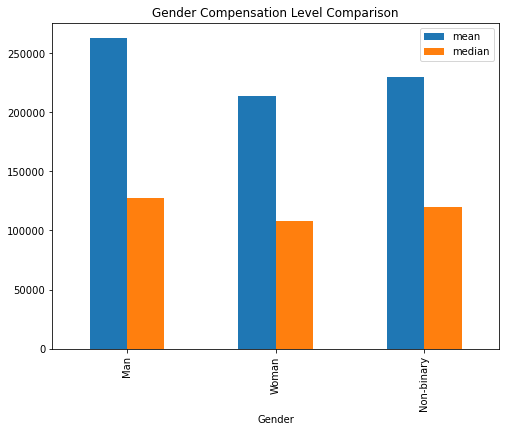

In [290]:
dfgender_des.loc[['Man','Woman','Non-binary'],['mean','median']].plot(kind='bar', legend=True, figsize=(8,6), xlabel= 'Gender')
plt.title('Gender Compensation Level Comparison') 
plt.show()

#### Without any control variables, women are less paid than man. 

Let's see whether result changes if I add control variables related to **code experience, education,organzation size and location they live**. The compensation is related to the local Consumer price index.  

In [291]:
dfusa

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly,GenderCleaned
5,6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,NaN,Prefer not to say
6,7,I code primarily as a hobby,I prefer not to say,United States of America,New Hampshire,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,...,Prefer not to say,No,NaN,I don't know,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,NaN,Prefer not to say
15,16,I am a student who is learning to code,"Student, full-time",United States of America,Missouri,NaN,"Secondary school (e.g. American high school, G...",5 - 10 years,Other (please specify):,7,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Too long,Easy,NaN,Man
36,37,I am a developer by profession,Employed full-time,United States of America,District of Columbia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Too short,Easy,103000.0,Man
37,38,I am a developer by profession,Employed full-time,United States of America,Massachusetts,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc)",20,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,300000.0,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83427,83428,I am a developer by profession,Employed full-time,United States of America,Pennsylvania,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",13,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,"I have an anxiety disorder;Or, in your own words:",Too short,Easy,4300000.0,Man
83429,83430,I code primarily as a hobby,"Not employed, but looking for work",United States of America,Washington,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc)",6,...,"Man;Or, in your own words:",Yes,Queer,White or of European descent,I am unable to / find it difficult to walk or ...,I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN,Non-binary
83430,83431,I am a developer by profession,Employed full-time,United States of America,Illinois,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",23,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,125000.0,Man
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0,Man


In [292]:
dfusa.isnull().mean()

ResponseId                      0.000000
MainBranch                      0.000000
Employment                      0.001439
Country                         0.000000
US_State                        0.024071
UK_Country                      1.000000
EdLevel                         0.004775
Age1stCode                      0.002486
LearnCode                       0.004775
YearsCode                       0.014979
YearsCodePro                    0.210819
DevType                         0.166143
OrgSize                         0.225340
Currency                        0.221219
CompTotal                       0.349751
CompFreq                        0.329343
LanguageHaveWorkedWith          0.010139
LanguageWantToWorkWith          0.078755
DatabaseHaveWorkedWith          0.203362
DatabaseWantToWorkWith          0.349490
PlatformHaveWorkedWith          0.321690
PlatformWantToWorkWith          0.462585
WebframeHaveWorkedWith          0.287350
WebframeWantToWorkWith          0.415228
MiscTechHaveWork

To apply linear regression models, drop rows with missing value in **ConvertedCompYearly, EdLevel, YearsCode, US_State,OrgSize**. 

Non-binary and prefer not to say choices are excluded in the sample.

In [293]:
## Select man and women rows
dfusaGender = dfusa[dfusa['GenderCleaned'].isin (['Man','Woman'])]

In [294]:
dfusaGender.head() 

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly,GenderCleaned
15,16,I am a student who is learning to code,"Student, full-time",United States of America,Missouri,NaN,"Secondary school (e.g. American high school, G...",5 - 10 years,Other (please specify):,7,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Too long,Easy,NaN,Man
36,37,I am a developer by profession,Employed full-time,United States of America,District of Columbia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Too short,Easy,103000.0,Man
37,38,I am a developer by profession,Employed full-time,United States of America,Massachusetts,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc)",20,...,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,300000.0,Man
47,48,"I used to be a developer by profession, but no...",Retired,United States of America,Louisiana,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Other (please specify):,39,...,Man,No,Straight / Heterosexual,White or of European descent,I am blind / have difficulty seeing,I have autism / an autism spectrum disorder (e...,Appropriate in length,Easy,NaN,Man
61,62,"I am not primarily a developer, but I write co...",Employed full-time,United States of America,Virginia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Online Courses or Certification,5,...,Man,NaN,NaN,NaN,None of the above,NaN,Appropriate in length,Easy,NaN,Man


In [295]:
dfusaGender_reg = dfusaGender[['GenderCleaned','ConvertedCompYearly', 'EdLevel', 'YearsCode', 'US_State','OrgSize']]

In [296]:
dfusaGender_reg

,GenderCleaned,ConvertedCompYearly,EdLevel,YearsCode,US_State,OrgSize
15,Man,NaN,"Secondary school (e.g. American high school, G...",7,Missouri,NaN
36,Man,103000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,District of Columbia,20 to 99 employees
37,Man,300000.0,Some college/university study without earning ...,20,Massachusetts,"1,000 to 4,999 employees"
47,Man,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",39,Louisiana,NaN
61,Man,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Virginia,"10,000 or more employees"
...,...,...,...,...,...,...
83426,Man,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11,Nebraska,500 to 999 employees
83427,Man,4300000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Pennsylvania,"1,000 to 4,999 employees"
83430,Man,125000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",23,Illinois,10 to 19 employees
83434,Man,160500.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Texas,20 to 99 employees


In [297]:
# drop nan value 
dfusaGender_reg = dfusaGender_reg.dropna()

In [298]:
dfusaGender_reg

,GenderCleaned,ConvertedCompYearly,EdLevel,YearsCode,US_State,OrgSize
36,Man,103000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,District of Columbia,20 to 99 employees
37,Man,300000.0,Some college/university study without earning ...,20,Massachusetts,"1,000 to 4,999 employees"
62,Man,130000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,New York,"10,000 or more employees"
64,Man,500000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,New York,2 to 9 employees
75,Man,105000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25,Minnesota,100 to 499 employees
...,...,...,...,...,...,...
83416,Man,15500.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",34,New Mexico,"1,000 to 4,999 employees"
83427,Man,4300000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Pennsylvania,"1,000 to 4,999 employees"
83430,Man,125000.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",23,Illinois,10 to 19 employees
83434,Man,160500.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Texas,20 to 99 employees


In [299]:
dfusaGender_reg.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          5317
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       1761
Some college/university study without earning a degree                                1135
Associate degree (A.A., A.S., etc.)                                                    394
Other doctoral degree (Ph.D., Ed.D., etc.)                                             373
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     183
Professional degree (JD, MD, etc.)                                                      50
Something else                                                                          35
Primary/elementary school                                                               34
Name: EdLevel, dtype: int64

In [300]:
dfusaGender_reg.OrgSize.value_counts()

10,000 or more employees                              2021
100 to 499 employees                                  1771
20 to 99 employees                                    1600
1,000 to 4,999 employees                              1198
500 to 999 employees                                   611
2 to 9 employees                                       587
10 to 19 employees                                     532
5,000 to 9,999 employees                               503
Just me - I am a freelancer, sole proprietor, etc.     297
I don’t know                                           162
Name: OrgSize, dtype: int64

In [301]:
# recode EdLevel and OrgSize into integer values
recode_nums = {"EdLevel": {"Primary/elementary school": 1, 
                           "Something else": 1, 
                           "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": 2, 
                           "Associate degree (A.A., A.S., etc.)":3, 
                           "Some college/university study without earning a degree":4, 
                           "Bachelor’s degree (B.A., B.S., B.Eng., etc.)":5,
                           "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":6,
                           "Professional degree (JD, MD, etc.)":7,
                           "Other doctoral degree (Ph.D., Ed.D., etc.)":7 },
               "OrgSize": {"I don’t know":0, 
                           "Just me - I am a freelancer, sole proprietor, etc.":1,
                           "2 to 9 employees":2,
                           "10 to 19 employees":3,
                           "20 to 99 employees":4,
                           "100 to 499 employees":5,
                           "500 to 999 employees":6,
                           "1,000 to 4,999 employees":7,
                           "5,000 to 9,999 employees":8,
                           "10,000 or more employees":9}}

In [302]:
dfusaGender_reg = dfusaGender_reg.replace(recode_nums)

In [303]:
# Create dummy for gender and US states
dfusaGender_reg['Woman'] = pd.get_dummies(dfusaGender_reg['GenderCleaned'],drop_first=True)

In [304]:
dfusaGender_reg = pd.concat([dfusaGender_reg.drop('US_State', axis=1), pd.get_dummies(dfusaGender_reg['US_State'], prefix='US_State', prefix_sep='_', drop_first=True)], axis=1)

In [305]:
dfusaGender_reg = dfusaGender_reg.drop('GenderCleaned',axis=1)

In [306]:
# replace YearsCode Choice More than 50 years as int 51 and Less than 1 year as 0.5
dfusaGender_reg['YearsCode'] = dfusaGender_reg['YearsCode'].apply(lambda x: 51 if x=='More than 50 years' else (0.5 if x=='Less than 1 year' else x))

In [307]:
dfusaGender_reg['YearsCode'] = dfusaGender_reg['YearsCode'].astype('int64',copy=False)

In [308]:
dfusaGender_reg.reset_index(inplace=True)

In [309]:
dfusaGender_reg = dfusaGender_reg.drop('index',axis=1)

In [310]:
# import models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [311]:
# Run Linear Regression Models and Check P-Value
X = dfusaGender_reg.drop('ConvertedCompYearly',axis=1)
y = dfusaGender_reg['ConvertedCompYearly']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.011
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     1.794
Date:                 Tue, 26 Apr 2022   Prob (F-statistic):           0.000293
Time:                         21:12:29   Log-Likelihood:            -1.3962e+05
No. Observations:                 9282   AIC:                         2.794e+05
Df Residuals:                     9226   BIC:                         2.798e+05
Df Model:                           55                                         
Covariance Type:             nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
cons

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [312]:
X = dfusaGender_reg[['Woman','EdLevel','YearsCode','OrgSize']]
y = dfusaGender_reg['ConvertedCompYearly']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     ConvertedCompYearly   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     5.910
Date:                 Tue, 26 Apr 2022   Prob (F-statistic):           9.54e-05
Time:                         21:12:29   Log-Likelihood:            -1.3966e+05
No. Observations:                 9282   AIC:                         2.793e+05
Df Residuals:                     9277   BIC:                         2.794e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.251e+05   4.85e+04      2.58

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [342]:
dfusa[dfusa['GenderCleaned'].isin (['Man','Woman'])].groupby(['Gender', 'EdLevel']).size()

Gender  EdLevel                                                                           
Man     Associate degree (A.A., A.S., etc.)                                                    554
        Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          6387
        Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       2244
        Other doctoral degree (Ph.D., Ed.D., etc.)                                             518
        Primary/elementary school                                                              458
        Professional degree (JD, MD, etc.)                                                      78
        Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     948
        Some college/university study without earning a degree                                1811
        Something else                                                                         147
Woman   Associate 

### Question 1 answer:
The P value for the coefficient of variable woman is not significant. 
After controling company size, education level and code experience, female developers are not less paid tham male developers.

### Question 2:  Is employment status related to mental health problem?

In [313]:
# Drop Null value row related to employment status and mental health.
dfMental = df.dropna(subset=['Employment','MentalHealth'])

In [314]:
# Drop rows that repsondents choose prefer not to say
dfMental = dfMental[dfMental['Employment']!= 'I prefer not to say']
dfMental = dfMental[dfMental['MentalHealth']!= 'I prefer not to say']

In [315]:
dfMental = dfMental[['Employment','MentalHealth' ]]
dfMental.head()

,Employment,MentalHealth
0,"Independent contractor, freelancer, or self-em...",None of the above
1,"Student, full-time",None of the above
2,"Student, full-time",None of the above
5,"Student, part-time",I have a concentration and/or memory disorder ...
7,"Student, full-time",None of the above


In [316]:
# Create a dummy variable to see whether the respondent has mental helth problems
dfMental['Mental_dummy'] = dfMental['MentalHealth'].apply(lambda x: 0 if x=="None of the above" else 1)

In [317]:
dfMental.groupby('Employment').Mental_dummy.mean().sort_values()

Employment
Employed full-time                                      0.248568
Independent contractor, freelancer, or self-employed    0.259695
Retired                                                 0.271523
Student, full-time                                      0.285080
Student, part-time                                      0.299946
Employed part-time                                      0.310556
Not employed, and not looking for work                  0.357268
Not employed, but looking for work                      0.364641
Name: Mental_dummy, dtype: float64

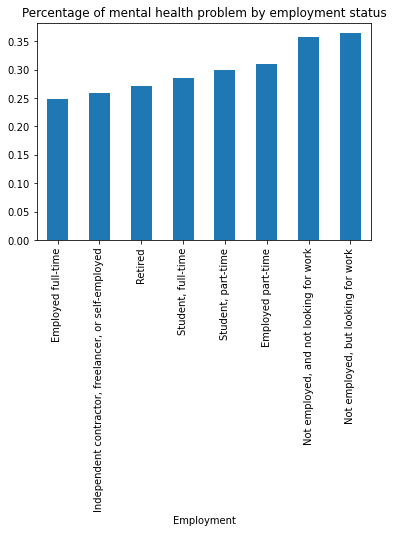

In [318]:
dfMental.groupby('Employment').Mental_dummy.mean().sort_values().plot(kind='bar')
plt.title('Percentage of mental health problem by employment status')
plt.show()

In [351]:
pd.Series(dfMental['MentalHealth'].str.split(';')).explode().value_counts()

None of the above                                                          56020
I have an anxiety disorder                                                  7258
I have a mood or emotional disorder (e.g. depression, bipolar disorder)     6790
I have a concentration and/or memory disorder (e.g. ADHD)                   6459
Prefer not to say                                                           3750
I have autism / an autism spectrum disorder (e.g. Asperger's)               2783
Or, in your own words:                                                      1353
Name: MentalHealth, dtype: int64

### Question 2 answer: Employment status is related to the mental health. Percentage of people who have mental issue is lowest in the full - time employed group. Over 35% people who are not employed but looking for work have mental health problem

### Question 3: Which are five jobs have lowest average salary?

In [319]:
dfDev = df[['ConvertedCompYearly', 'DevType']]
dfDev.head()

,ConvertedCompYearly,DevType
0,62268.0,"Developer, mobile"
1,NaN,NaN
2,NaN,NaN
3,NaN,"Developer, front-end"
4,NaN,"Developer, desktop or enterprise applications;..."


In [320]:
# Drop NaN value
dfDev = dfDev.dropna()

In [321]:
dfDev.head()

,ConvertedCompYearly,DevType
0,62268.0,"Developer, mobile"
9,51552.0,Data scientist or machine learning specialist
11,46482.0,"Developer, back-end"
12,77290.0,"Developer, desktop or enterprise applications;..."
16,17748.0,"Developer, full-stack"


In [322]:
# Some respondents choose multiple choices. Need to split the choices and add rows to dataset
dfDev['Devsplit'] = dfDev['DevType'].str.split(';')

In [323]:
dfDev = dfDev.drop('DevType',axis = 1)

In [324]:
dfDev = dfDev.explode('Devsplit')

In [325]:
dfDev.rename(columns= {'Devsplit': 'Job'},inplace=True)

In [326]:
dfDev.groupby('Job').ConvertedCompYearly.mean().sort_values()

Job
Student                                           53721.437814
Academic researcher                               87520.796474
Developer, mobile                                 91002.219002
Educator                                          95916.883521
Developer, game or graphics                       98984.463190
Developer, front-end                             104569.144261
System administrator                             107249.098109
Developer, QA or test                            110535.799544
Designer                                         113125.719780
Developer, back-end                              113482.992876
Database administrator                           114322.431470
Developer, full-stack                            117214.549368
Scientist                                        118783.559674
Engineer, data                                   119498.268531
Marketing or sales professional                  119612.165563
Data or business analyst                         12

<AxesSubplot:title={'center':'Salary rank by job title'}, xlabel='Job'>

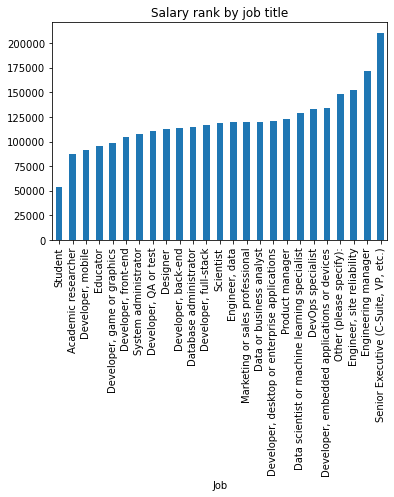

In [327]:
dfDev.groupby('Job').ConvertedCompYearly.mean().sort_values().plot(kind='bar', title="Salary rank by job title")

### Question 3 answer: Student, academic researcher, Mobile Developer, educator, gamer or graphic developer are the five jobs with the lowest average salary.